In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import calendar
import numpy as np
import pandas as pd
from joblib import load

from helper import *

In [3]:
showings = load('../data/showings_extra_feature.joblib')
showings.replace(np.inf, 0, inplace=True)
genres = load('../data/genres.joblib')

In [4]:
week_of_release = showings.loc[showings.days_since_release < 10, ('dayofweek', 'tmdb_genre_ids', 'year', 'coverage')]
after_week_of_release = showings.loc[showings.days_since_release > 10, ('dayofweek', 'tmdb_genre_ids', 'year', 'coverage')]

genre = set()
all_genres = showings.tmdb_genre_ids.tolist()
for i in all_genres:
    genre.update(i)

# Coverage by genre

In [6]:
stats = dict()
stats_after = dict()
for i in genre:
    stats[genres[i]] = week_of_release.loc[week_of_release.tmdb_genre_ids.apply(lambda numbers: i in numbers), 'coverage']
    stats_after[genres[i]] = after_week_of_release.loc[after_week_of_release.tmdb_genre_ids.apply(lambda numbers: i in numbers), 'coverage']

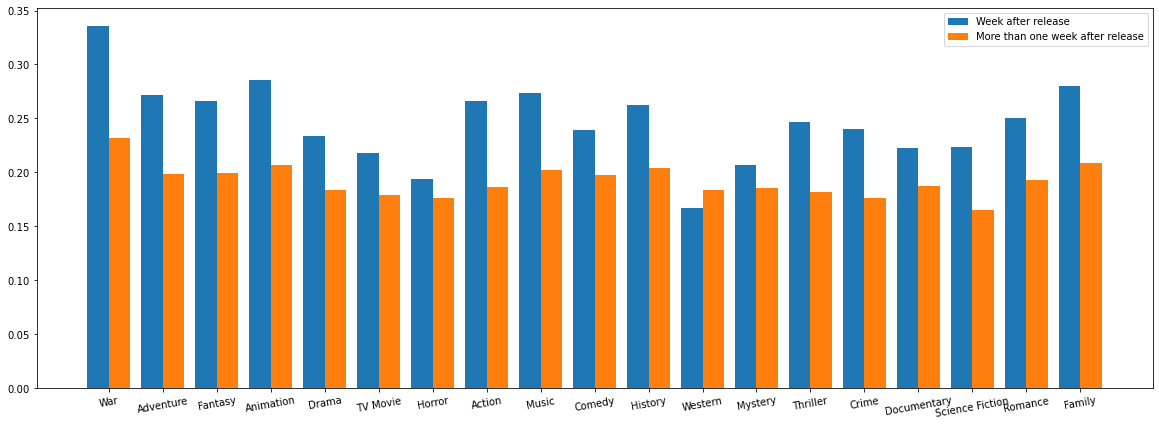

In [10]:
two_bar_plot(stats, stats_after, w=20, h=7, r=10, legend=('Week after release', 'More than one week after release'), file_name='genre_release')

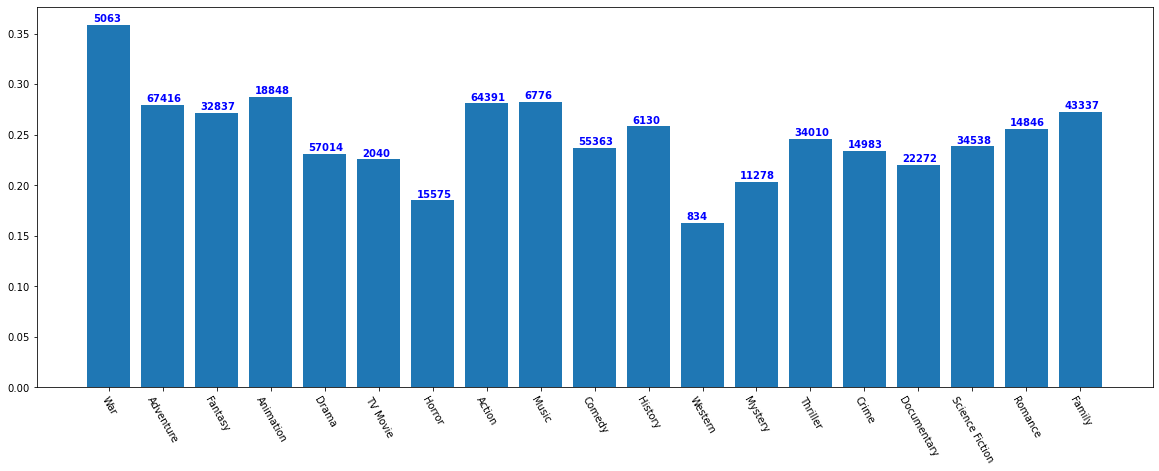

In [25]:
bar_plot(stats, w=20, h=7)

# Coverage by Genres by year

In [29]:
stats = dict()
for i in range(2007, 2021):
    stats[i] = dict()
    temp = week_of_release.loc[week_of_release.year == i]
    for j in genre:
        stats[i][genres[j]] = temp.loc[temp.tmdb_genre_ids.apply(lambda numbers: j in numbers), 'coverage']

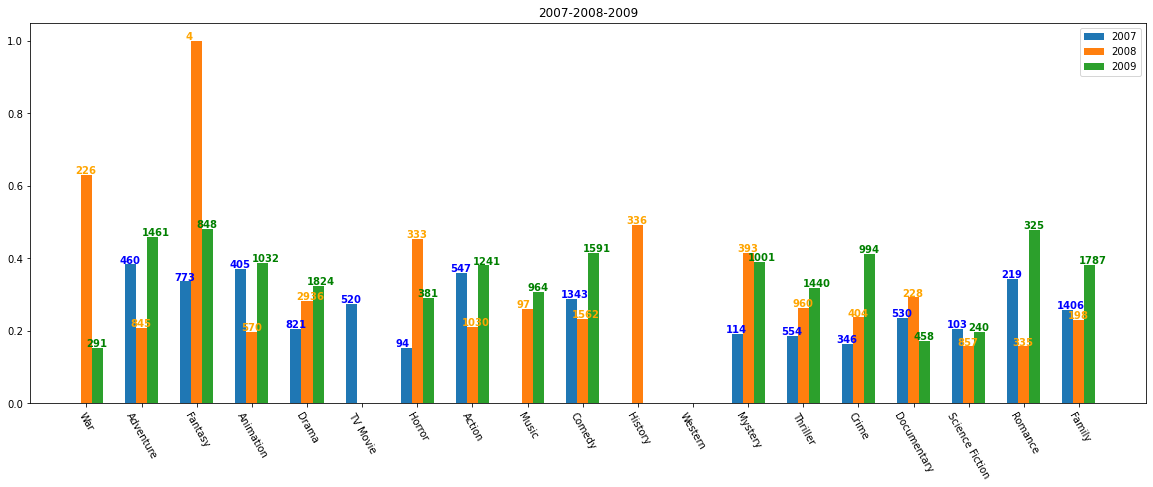

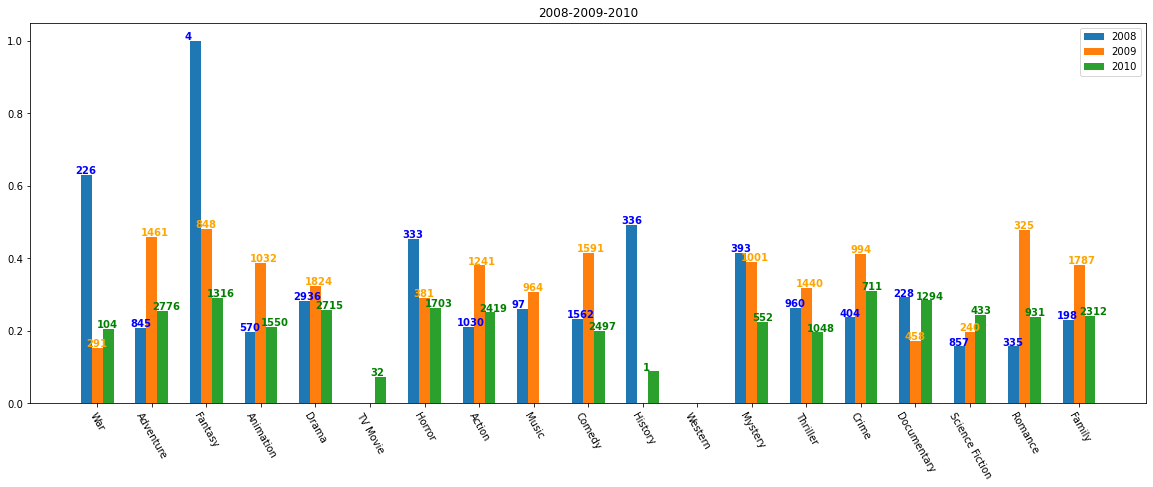

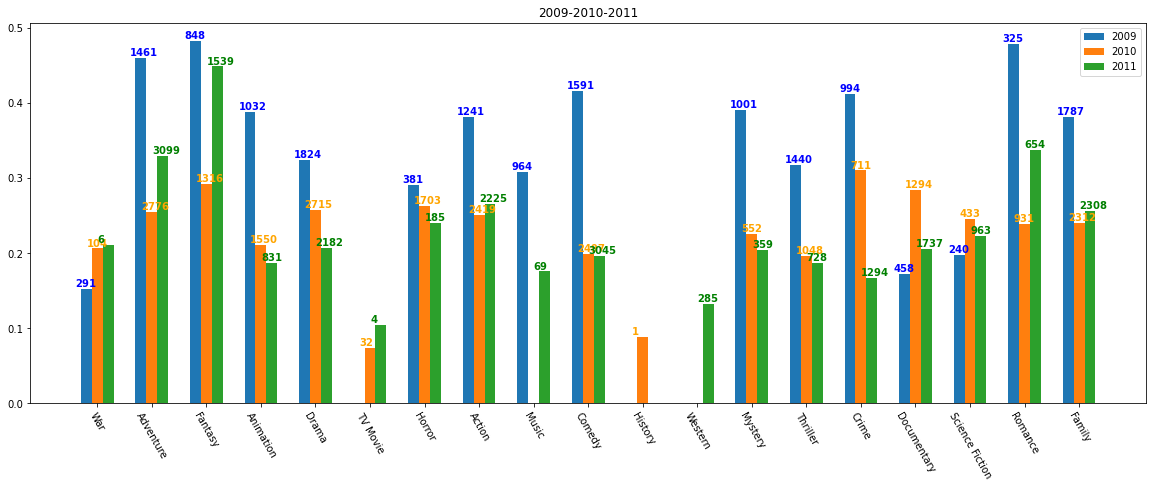

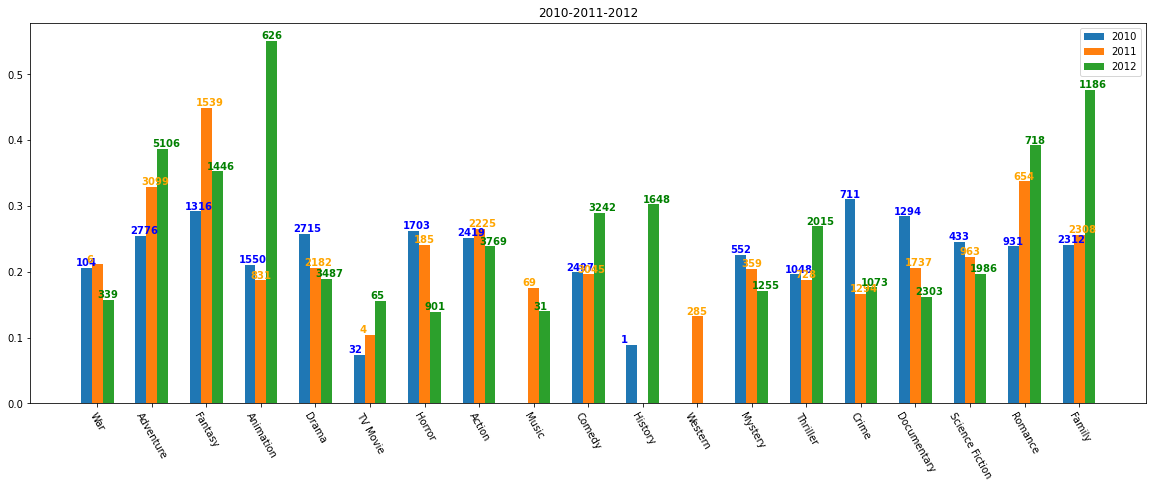

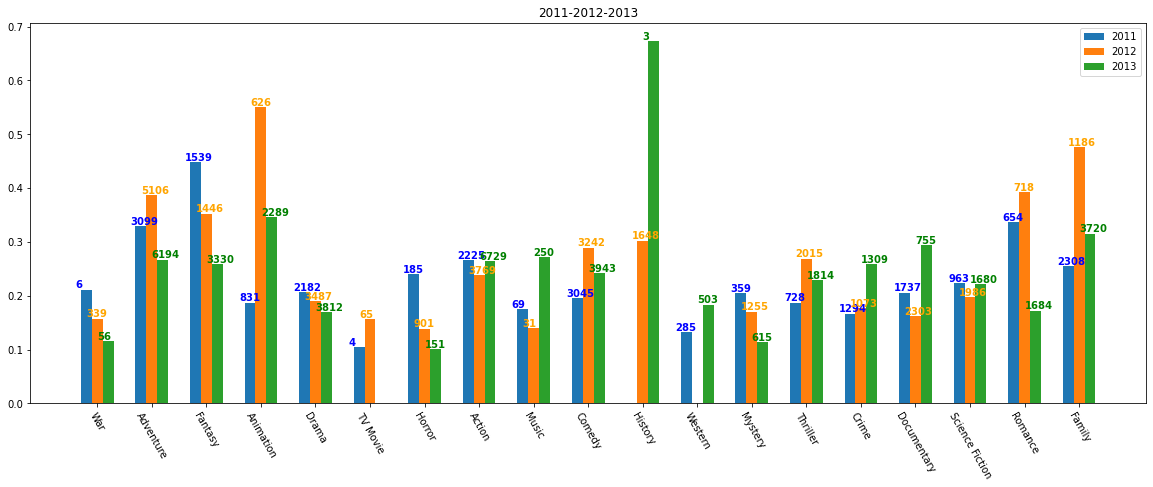

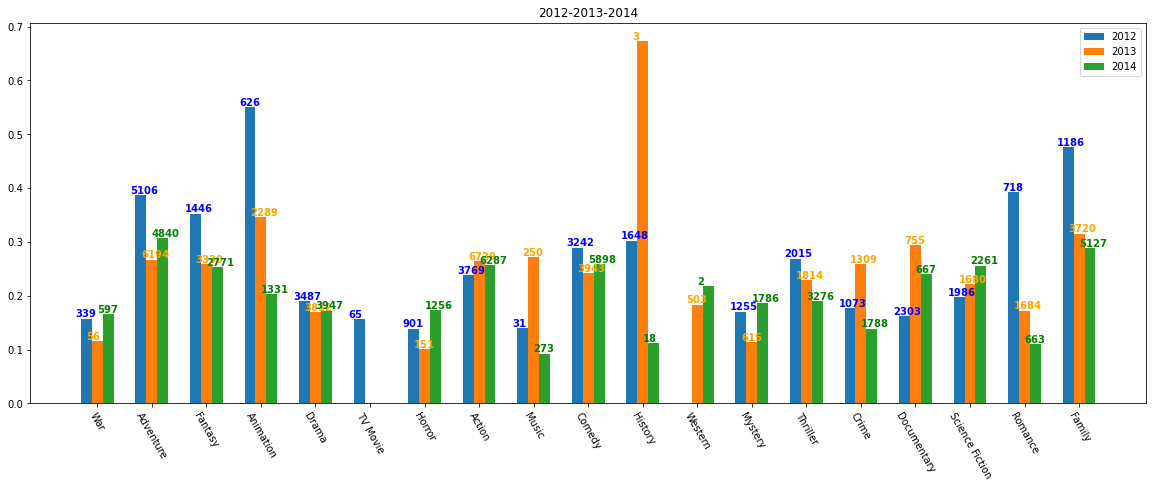

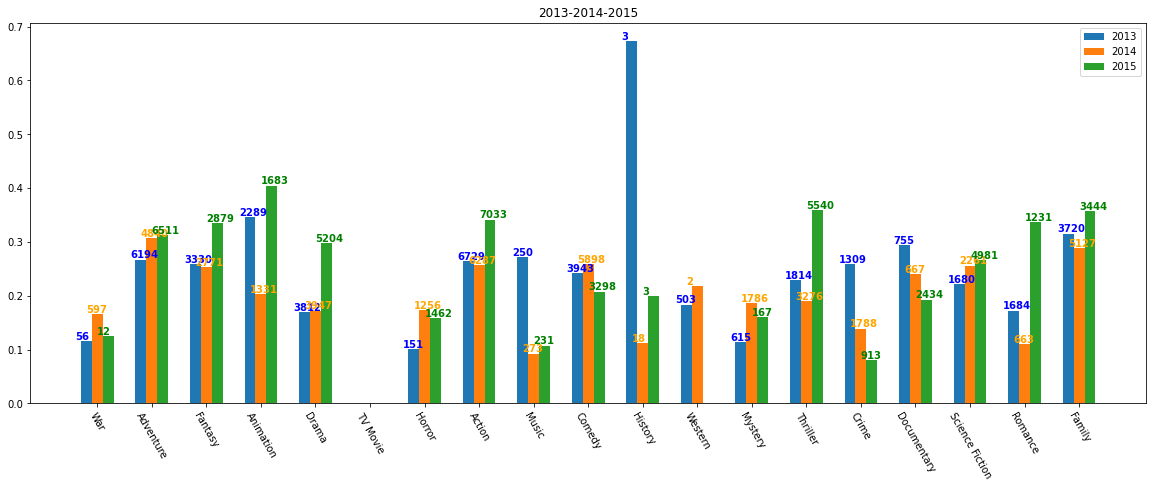

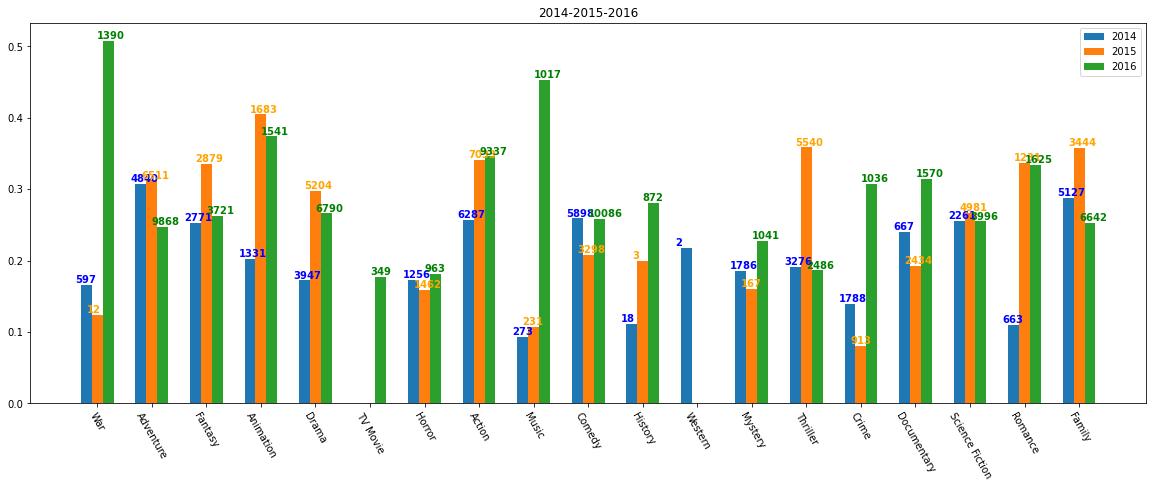

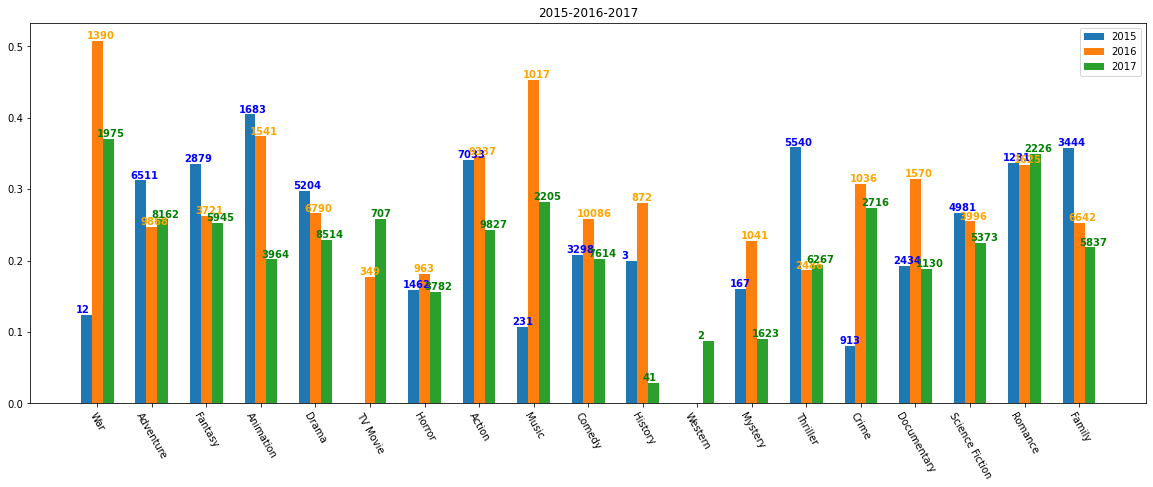

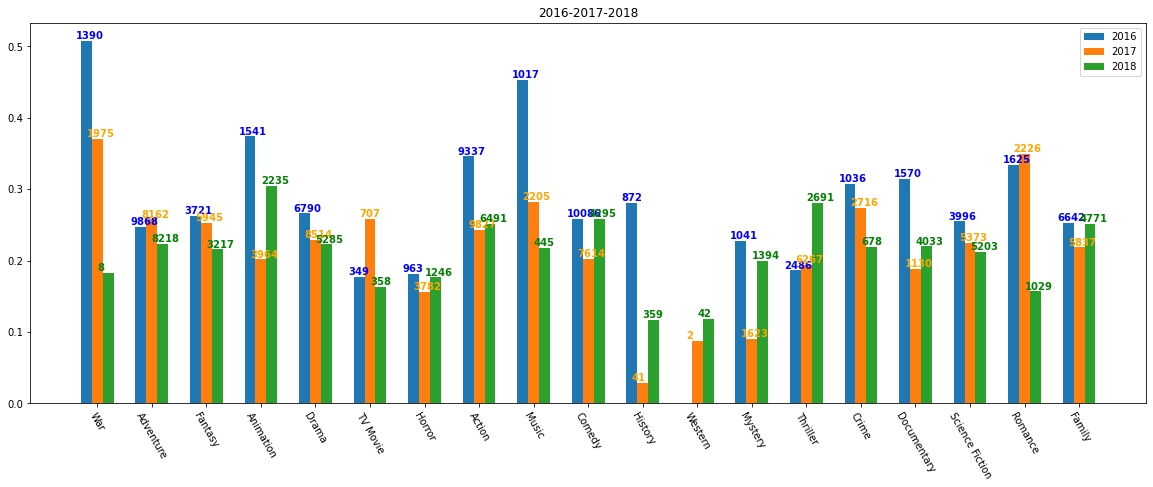

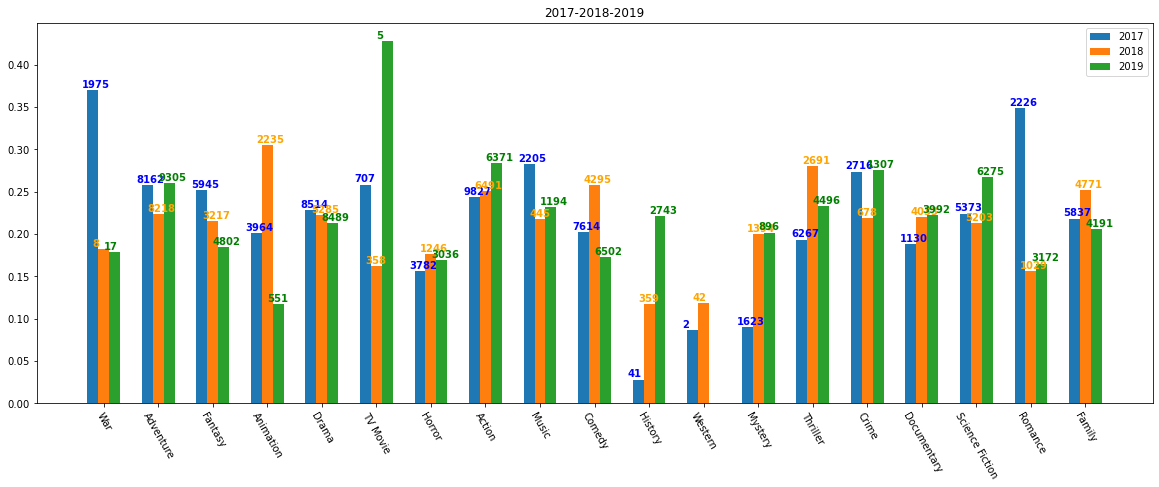

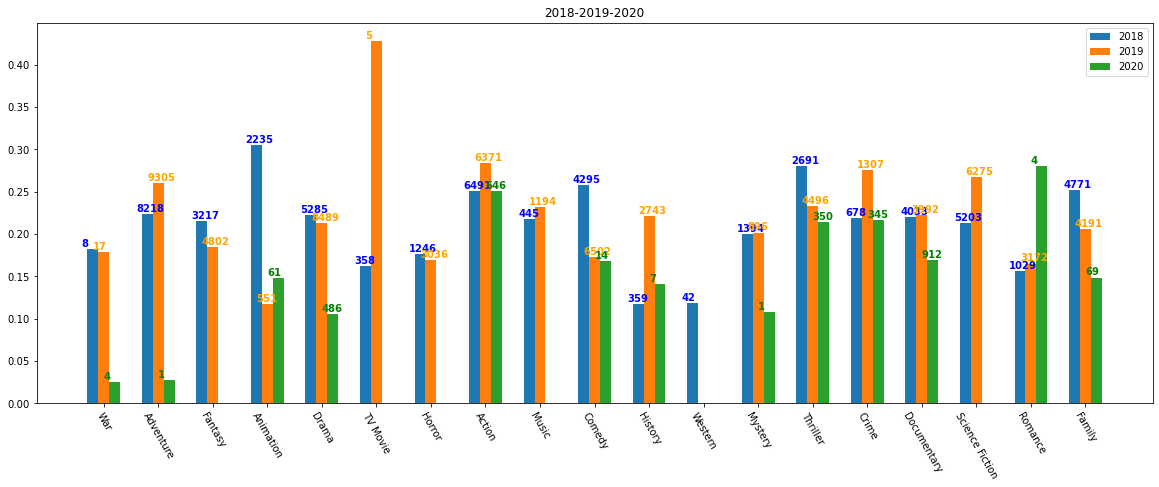

In [31]:
for year in stats:
    if year+2 == 2021: break
    three_bar_plot(stats[year], stats[year+1], stats[year+2],
                   title=str(year)+'-'+str(year+1)+'-'+str(year+2),
                   legend=(str(year), str(year+1), str(year+2)),
                   w=20, h=7, r=300, count=True)